## Tema 3. Identificación de sistemas

Ejemplos de identificación de sistemas empleando Python.

## Ejemplo circuito RC.

Supongamos un circuito RC, con $R = 1$ $\Omega$ y $C = 1$ F y un periodo de muestreo $T = 100$ ms. A partir del ejemplo visto en el tema 2, calculamos el valor de $\alpha$:

In [145]:
import numpy as np
import matplotlib.pyplot as plt

En primer lugar, simulamos la respuesta del sistema discreto:

In [146]:
R = 1
C = 1
T = 1e-1
a = T/(R*C+T)
N = 50  # Número de muestras
x = np.ones(N)  # Entrada escalón unitario
y = np.zeros(N)  # Inicialización de la salida

/var/folders/rd/538_l1b50r91x5h8nv7k69jh0000gn/T/ipykernel_4331/3436023029.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(N), y)


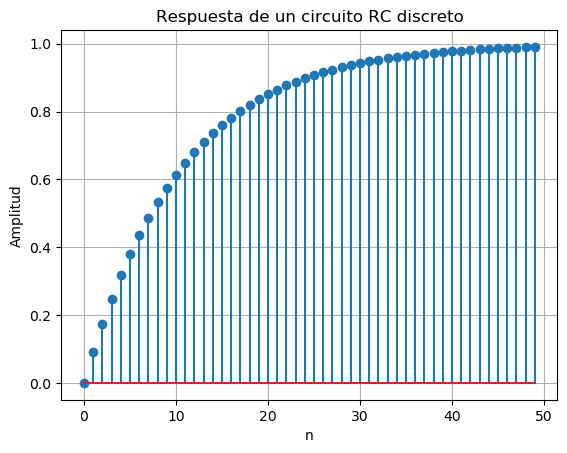

In [147]:
# Ecuación en diferencias
y[0] = 0  # Condición inicial
for n in range(1, N):
    y[n] = (1 - a) * y[n-1] + a * x[n]


# Graficar
plt.stem(range(N), y)
plt.title("Respuesta de un circuito RC discreto")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Calculamos por mínimos cuadrados los parámetros de la ecuación en diferencias:

In [148]:
Phi = np.transpose( np.array([y[:-1],x[:-1]]) )
theta = np.dot( np.matmul( np.linalg.inv( np.matmul( np.transpose(Phi),Phi ) ), np.transpose(Phi) ), y[1:])
 

Comprobamos:

In [149]:
print(theta)
print(1-a,a)

[0.90909091 0.09090909]
0.9090909090909091 0.09090909090909091


También es posible emplear directamente la función de ``numpy``que calcula la pseudoinversa:

In [150]:
np.dot( np.linalg.pinv(Phi),y[1:] )

array([0.90909091, 0.09090909])

¿Qué pasará si añadimos ruido a la señal?

/var/folders/rd/538_l1b50r91x5h8nv7k69jh0000gn/T/ipykernel_4331/417471553.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(N), y)


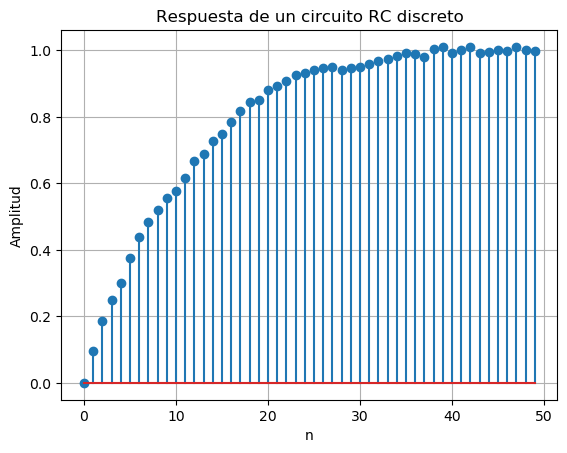

In [151]:
# Ecuación en diferencias
y[0] = 0  # Condición inicial
for n in range(1, N):
    y[n] = (1 - a) * y[n-1] + a * x[n] + 0.01*np.random.normal()


# Graficar
plt.stem(range(N), y)
plt.title("Respuesta de un circuito RC discreto")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

In [152]:
Phi = np.transpose( np.array([y[:-1],x[:-1]]) )
theta = np.dot( np.linalg.pinv(Phi),y[1:] )
a1 = theta[1]
print(theta)

[0.91234003 0.08940989]


/var/folders/rd/538_l1b50r91x5h8nv7k69jh0000gn/T/ipykernel_4331/3297646235.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(N), y)


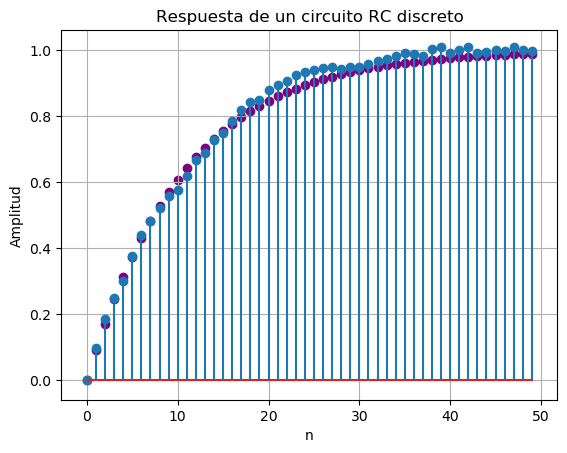

In [153]:
y1 = np.zeros(N)  # Inicialización de la salida
# Ecuación en diferencias
y1[0] = 0  # Condición inicial
for n in range(1, N):
    y1[n] = (1 - a1) * y1[n-1] + a1 * x[n]


# Graficar
plt.stem(range(N), y)
plt.scatter(range(N), y1,color='purple')
plt.title("Respuesta de un circuito RC discreto")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

## Ejemplo ejercicio identificación

Se desea identificar el modelo discreto de un sistema donde se ha medido la siguiente respuesta a la señal de entrada.

Entrada: $ u_k = \left\{ 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, ... \right\} $

Salida: $ y_k =  \left\{ 0, 0, 0.25, 0.375, -0.2625, -0.6821, 0.1194, 0.8547, 0.0818, -0.8928, ... \right\} $

/var/folders/rd/538_l1b50r91x5h8nv7k69jh0000gn/T/ipykernel_4331/3641302982.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(len(uk)), uk)
/var/folders/rd/538_l1b50r91x5h8nv7k69jh0000gn/T/ipykernel_4331/3641302982.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(len(yk)), yk, linefmt='r-.',markerfmt='r*')


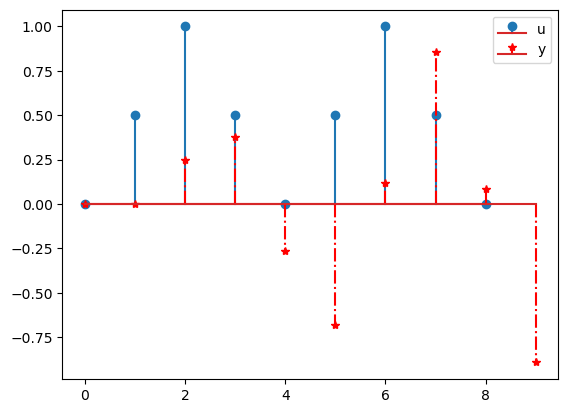

In [154]:
uk = [0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0]
yk = [0, 0, 0.25, 0.375, -0.2625, -0.6821, 0.1194, 0.8547, 0.0818, -0.8928]

plt.stem(range(len(uk)), uk)
plt.stem(range(len(yk)), yk, linefmt='r-.',markerfmt='r*')
plt.legend(['u','y'])

In [155]:
d = 2
Phi = np.transpose( np.array([-np.array( yk[d:len(uk)] ),uk[d:len(uk)]]) )
theta = np.dot( np.linalg.pinv(Phi),yk[d+1:len(uk)+1] )
print(theta)

[0.06619625 0.45150088]


/var/folders/rd/538_l1b50r91x5h8nv7k69jh0000gn/T/ipykernel_4331/511914195.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(len(yk)), yk)
/var/folders/rd/538_l1b50r91x5h8nv7k69jh0000gn/T/ipykernel_4331/511914195.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(len(y1)), y1, linefmt='r-.',markerfmt='r*')


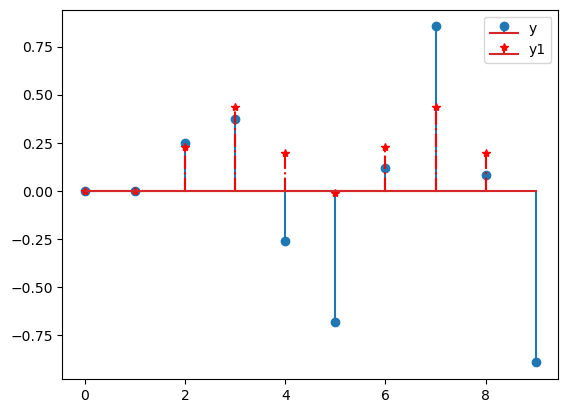

In [156]:
y1 = np.zeros(len(uk))  # Inicialización de la salida
# Ecuación en diferencias
y1[0] = 0  # Condición inicial
for n in range(1, len(uk)):
    y1[n] = -theta[0] * y1[n-1] + theta[1] * uk[n-1]

plt.stem(range(len(yk)), yk)
plt.stem(range(len(y1)), y1, linefmt='r-.',markerfmt='r*')
plt.legend(['y','y1'])


In [157]:
d = 2
Phi = np.transpose( np.array([-np.array( yk[d-1:len(uk)-2] ),-np.array( yk[d:len(uk)-1] ),uk[d-1:len(uk)-2],uk[d:len(uk)-1]]) )
theta = np.dot( np.linalg.pinv(Phi),yk[d+1:len(uk)] )
print(theta)

[ 0.79931296 -0.5003184  -0.50090718  0.50057144]


/var/folders/rd/538_l1b50r91x5h8nv7k69jh0000gn/T/ipykernel_4331/1415792377.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(len(yk)), yk)
/var/folders/rd/538_l1b50r91x5h8nv7k69jh0000gn/T/ipykernel_4331/1415792377.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(len(y1)), y1, linefmt='r-.',markerfmt='r*')


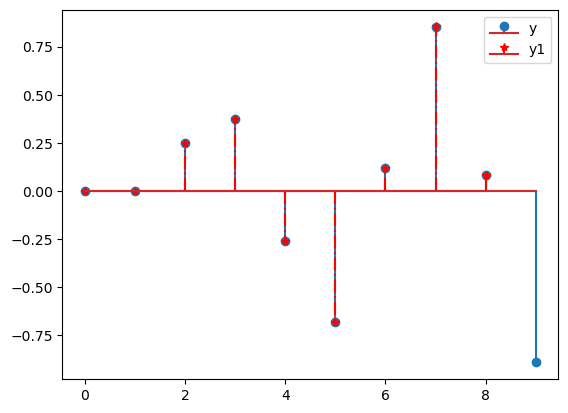

In [158]:
y1 = np.zeros(len(uk))  # Inicialización de la salida
# Ecuación en diferencias
y1[0] = 0  # Condición inicial
for n in range(2, len(uk)):
    y1[n] = -theta[0] * y1[n-2] -theta[1] * y1[n-1] + theta[2] * uk[n-2] + theta[3] * uk[n-1]

plt.stem(range(len(yk)), yk)
plt.stem(range(len(y1)), y1, linefmt='r-.',markerfmt='r*')
plt.legend(['y','y1'])